## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform, pdist,jaccard
import sys,  datetime, os
import requests
import chardet
from scipy.stats.stats import pearsonr

In [2]:
from sklearn import metrics
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt

## Load Data

In [3]:
names = []
files = []

for filename in os.listdir('All_bmat/'):
    names.append(filename[:-12])
    df = pd.read_table('All_bmat/'+ filename)
    files.append(df.set_index(df.columns[0]))

namefiles_dict=dict(zip(names, files))    

## Function that will find the pairwise dist for each db

In [4]:
def pairwise_dis(df, metric):
    array_matrix = metrics.pairwise_distances(df, metric = metric)
    return array_matrix

def vector(array_matrix):
    return squareform(array_matrix)

In [ ]:
for db in names:
    df = namefiles_dict[db]
    matrix = pairwise_dis(df,'manhattan')
    arr_filename = db + 'arr'
    np.save('Full_arr_mat/' + arr_filename, matrix)
    vect_filename = db + 'vect'
    np.save('Full_SQR_vect/' + vect_filename, vector(matrix))

## Pairwise for each pair of sources

In [7]:
global_df = pd.DataFrame(0, index = names, columns = names)
global_df.head()

,DrugBank_Targets,PharmagKB_SE,TTD_Indications,Sider_Indications,ChEMBL_MOA,DrugIndicationDB_Indications,DrugCentral_Targets,DrugGeneInteract_Targets,DrugRepurposing_Targets,DrugRepurposing_MOA,Sider_SE,BindingDB_Targets,L1000_signatures,Matador_Targets
DrugBank_Targets,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PharmagKB_SE,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TTD_Indications,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sider_Indications,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ChEMBL_MOA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
for dbname1 in names:
    for dbname2 in names:
        db1, db2 = namefiles_dict[dbname1].T, namefiles_dict[dbname2].T
        shared = sorted(list(set(db1.index) & set(db2.index)))
        db1 = db1.loc[shared]
        db2 = db2.loc[shared]
        db1_vect = vector(pairwise_dis(db1, 'manhattan'))
        db2_vect = vector(pairwise_dis(db2, 'manhattan'))
        p_coeff = pearsonr(db1_vect, db2_vect)[0]
        global_df.loc[dbname1, dbname2] = p_coeff

In [9]:
pairwise_dis(db1, 'manhattan').shape

(402, 402)

In [10]:
pairwise_dis(db2, 'manhattan').shape

(402, 402)

In [11]:
global_df.head(2)

,DrugBank_Targets,PharmagKB_SE,TTD_Indications,Sider_Indications,ChEMBL_MOA,DrugIndicationDB_Indications,DrugCentral_Targets,DrugGeneInteract_Targets,DrugRepurposing_Targets,DrugRepurposing_MOA,Sider_SE,BindingDB_Targets,L1000_signatures,Matador_Targets
DrugBank_Targets,1.000000,0.091691,0.014343,0.105706,0.251992,0.244065,0.289408,0.366812,0.783047,0.222933,0.171422,0.031253,0.004961,0.179694
PharmagKB_SE,0.091691,1.000000,-0.049658,0.220222,-0.005490,0.338174,0.064122,0.315889,0.035058,0.049764,0.233474,-0.036006,-0.094261,-0.064100


## Plots

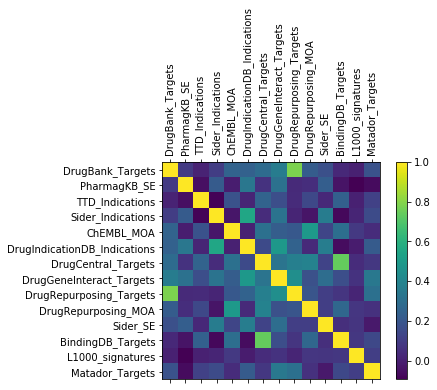

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(global_df)
fig.colorbar(cax)

plt.xticks(range(len(names)),names, rotation = 90)
plt.yticks(range(len(names)),names)
plt.show()

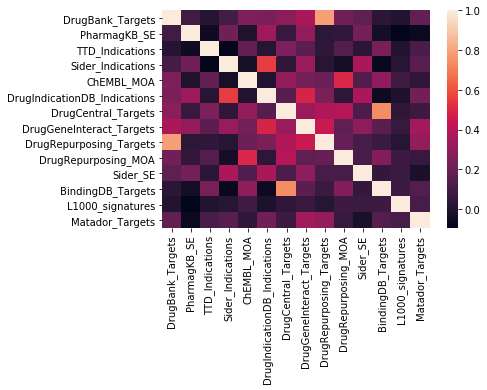

In [28]:
sns.heatmap(global_df)

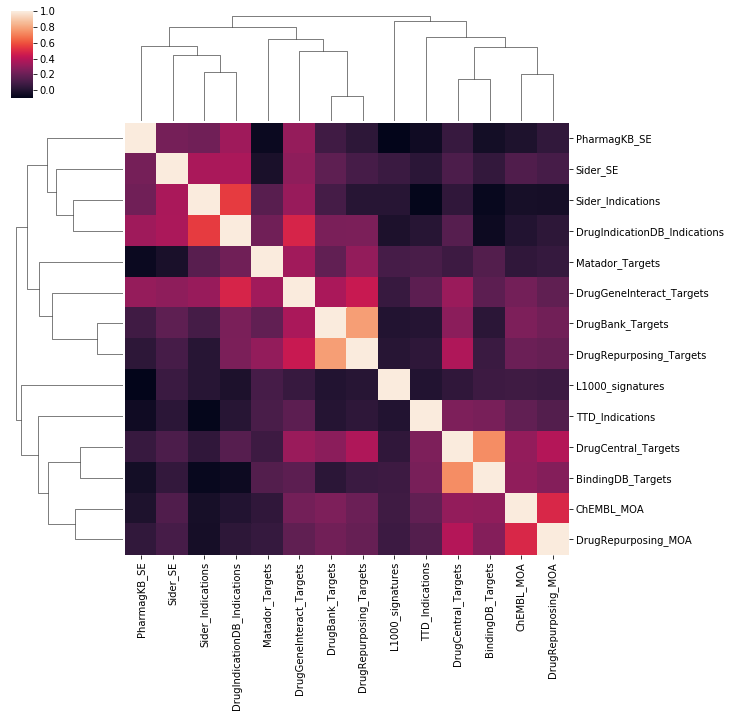

In [29]:
sns.clustermap(global_df)